In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../input/RTA Dataset.csv")
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
data.shape

(12316, 32)

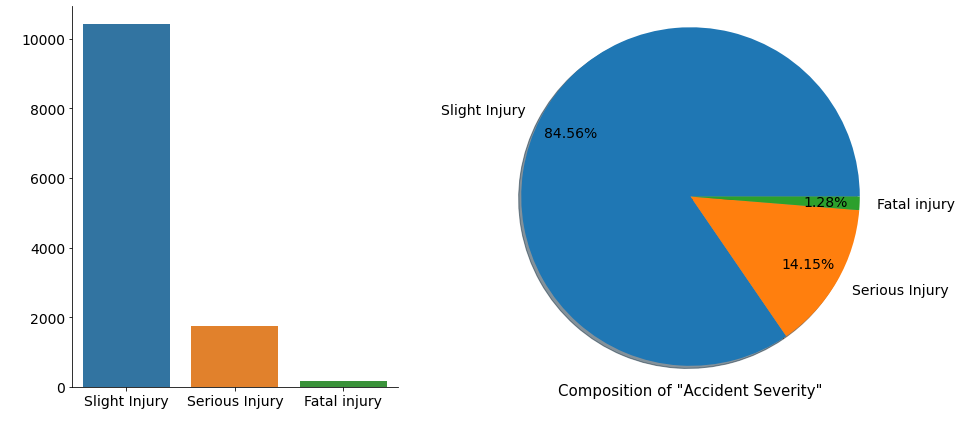

In [5]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=data["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(data["Accident_severity"].value_counts(),
        labels=list(data["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [6]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
data.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
train_missing= missing_values_table(data)
train_missing

Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Defect_of_vehicle,4427,35.9
Service_year_of_vehicle,3928,31.9
Work_of_casuality,3198,26.0
Fitness_of_casuality,2635,21.4
Type_of_vehicle,950,7.7
Types_of_Junction,887,7.2
Driving_experience,829,6.7
Educational_level,741,6.0
Vehicle_driver_relation,579,4.7
Owner_of_vehicle,482,3.9


<AxesSubplot:ylabel='None'>

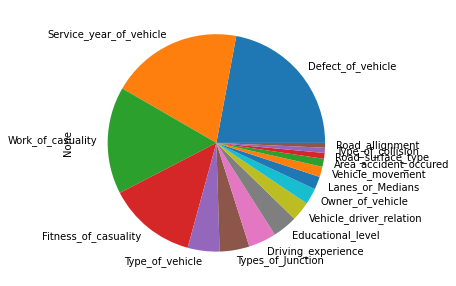

In [10]:
data.isnull().sum().sort_values(ascending=False).plot.pie(figsize=(5, 5))

In [11]:
#!pip install missingno

In [12]:
import missingno as msno

<AxesSubplot:>

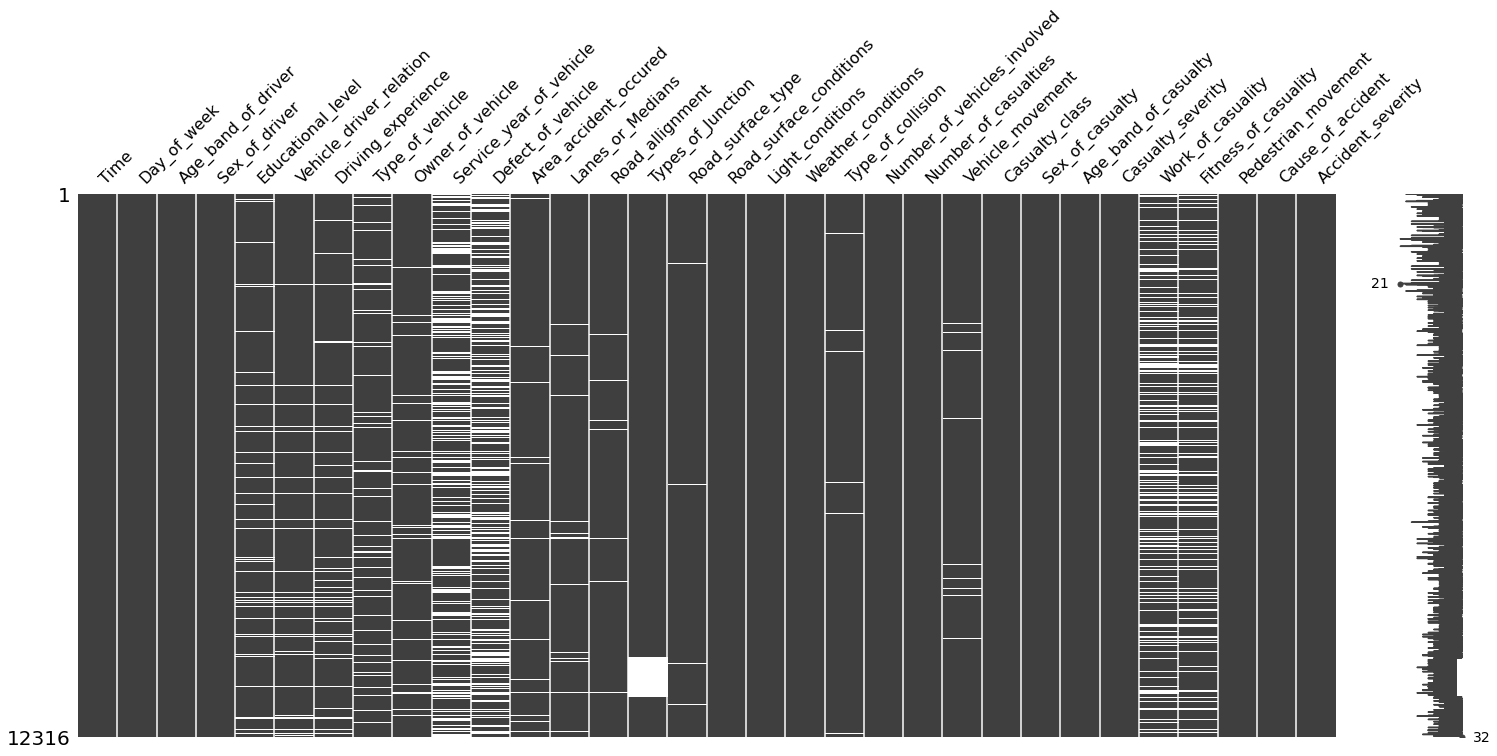

In [13]:
msno.matrix(data)

<AxesSubplot:>

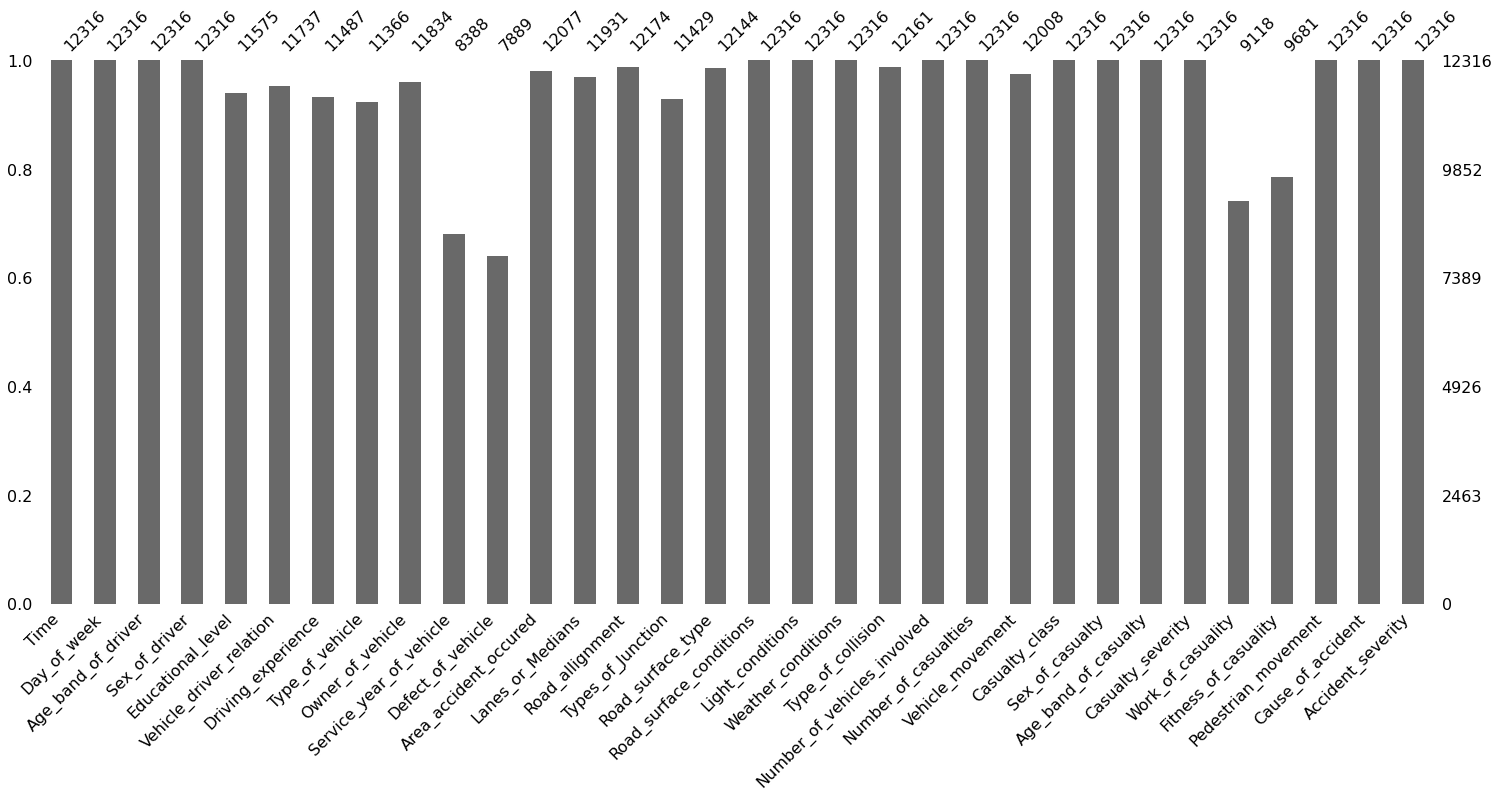

In [14]:
msno.bar(data)

<AxesSubplot:>

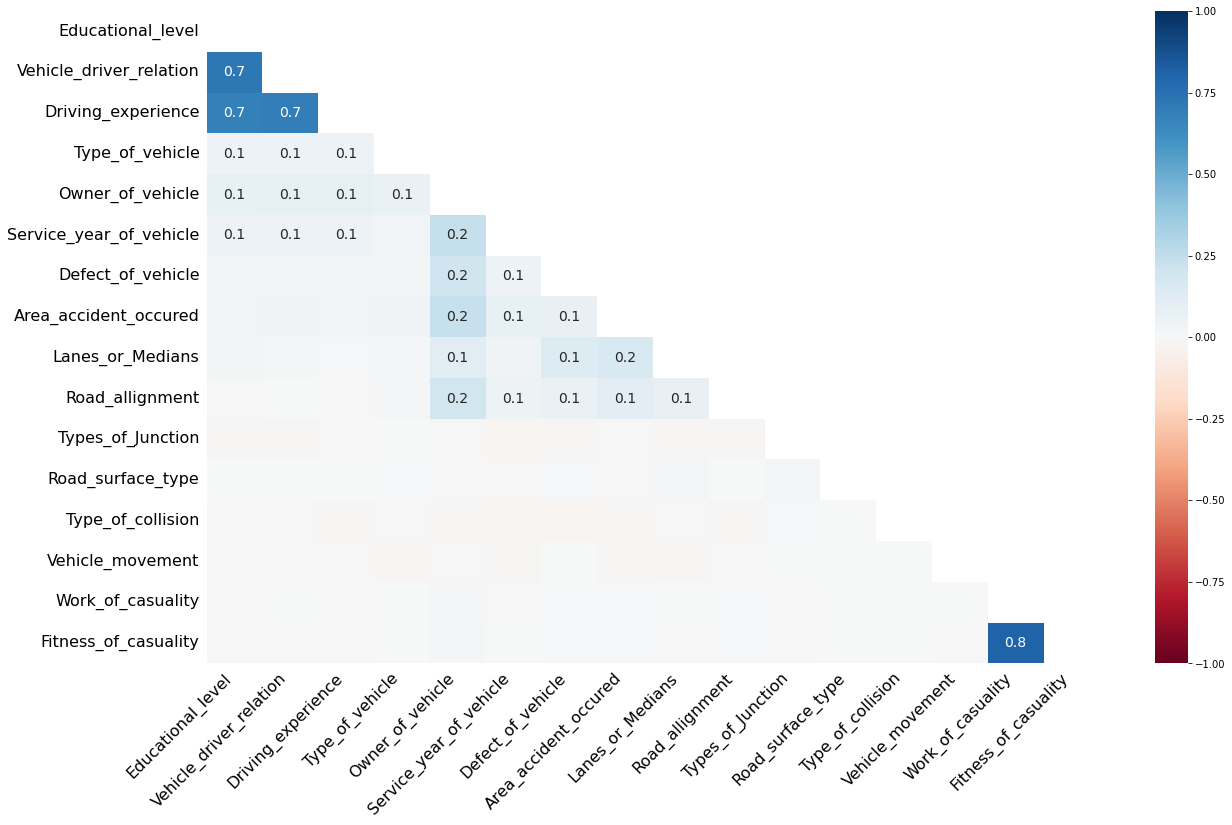

In [15]:
msno.heatmap(data)

<AxesSubplot:>

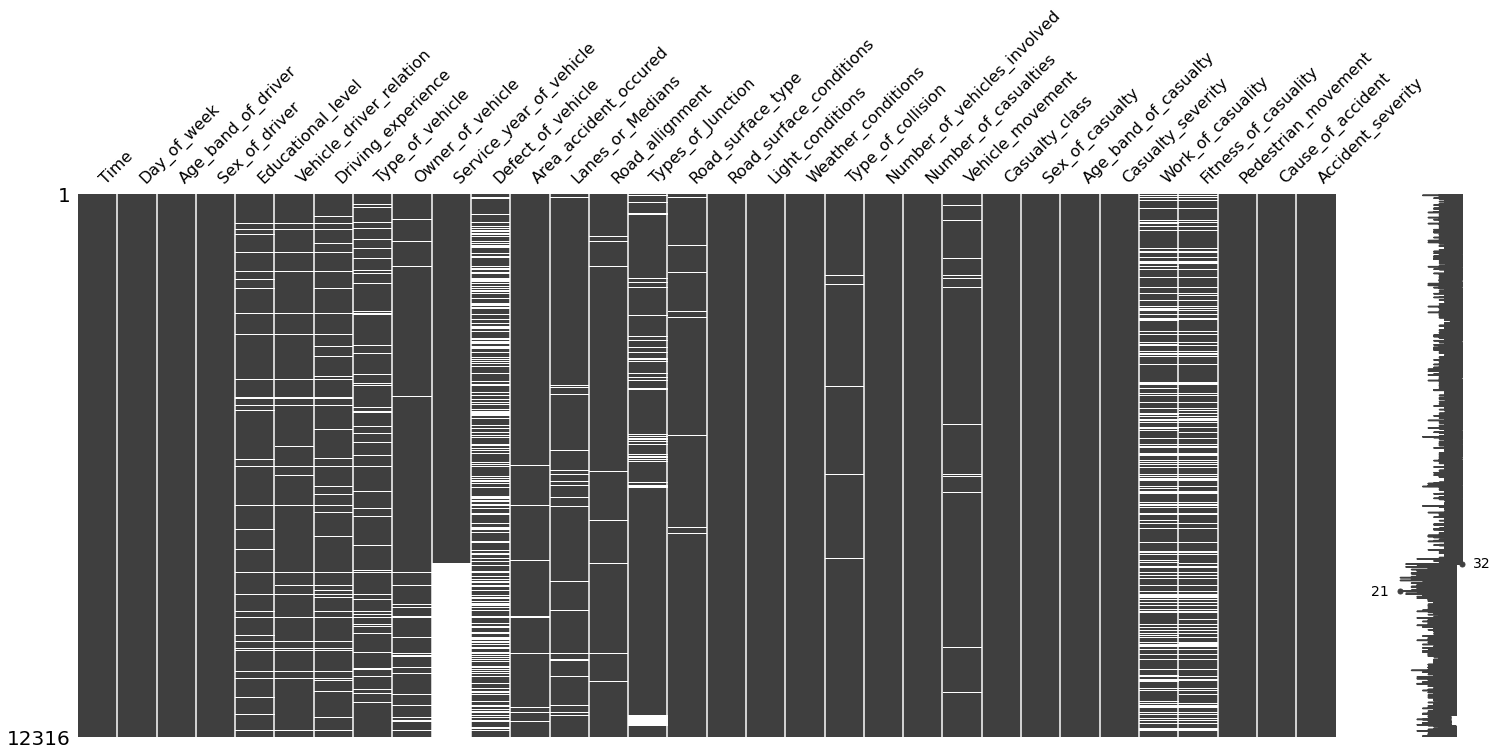

In [16]:
sorted = data.sort_values('Service_year_of_vehicle')
msno.matrix(sorted)

<AxesSubplot:>

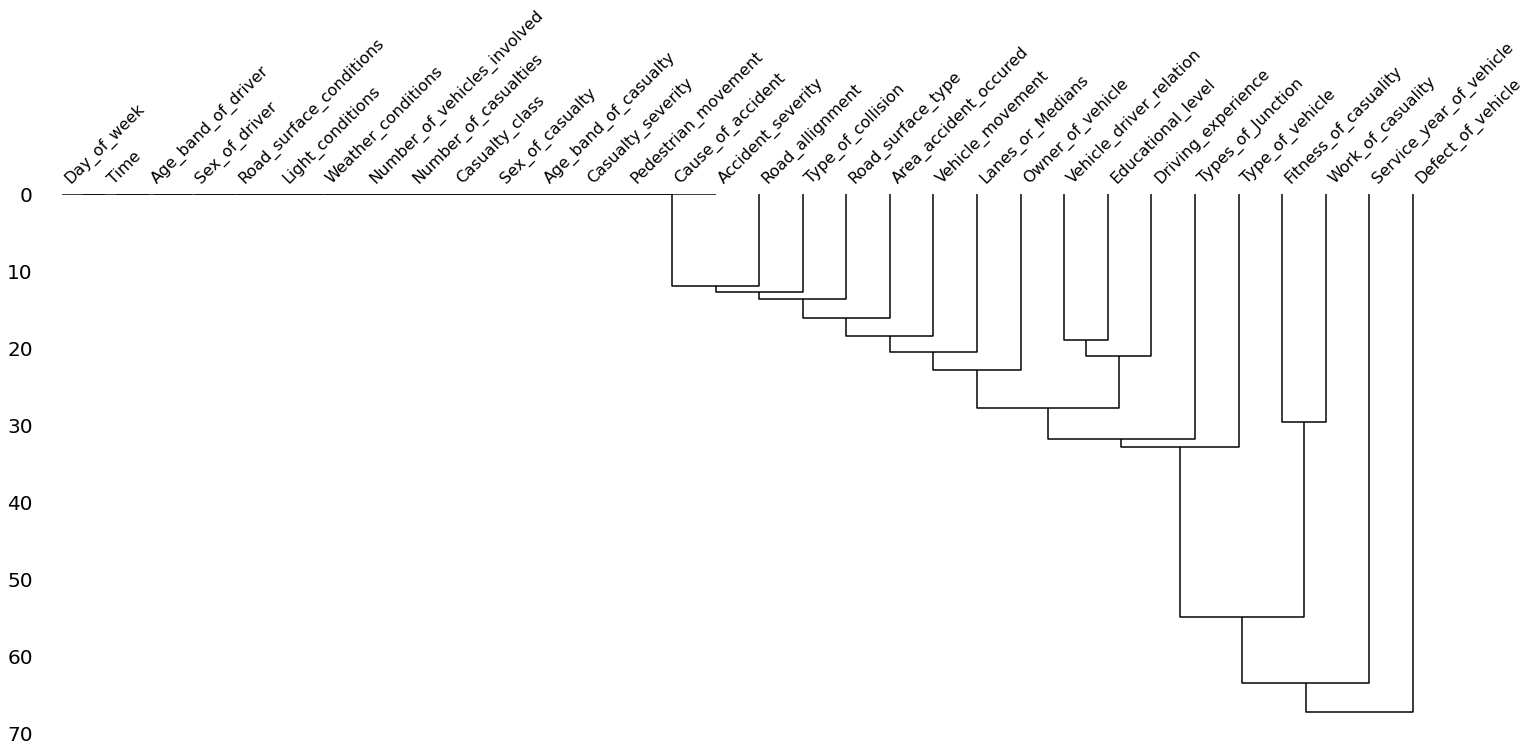

In [17]:
msno.dendrogram(data)

We can summarize the table as:

1. Number of observations: 891
2. Number of columns: 15
3. Memory Usage: 80.7+ KB
4. Number of boolean columns: 2
4. Number of category columns: 2
4. Number of float columns: 2
4. Number of int columns: 4
4. Number of object columns: 5
5. Number of columns with missing values: 4
6. Colums with missing values: age, embarked, deck, embark_town

### Duplicate Values

In [18]:
data.duplicated().sum()

0

In [19]:
data.corr().style.background_gradient(cmap='Oranges')

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


Get Cat Dataframe

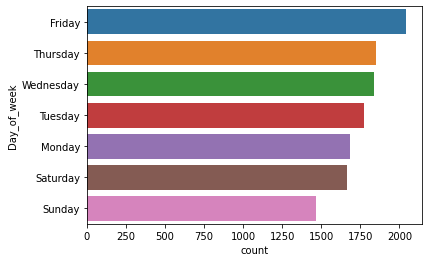

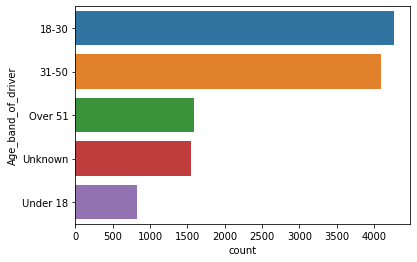

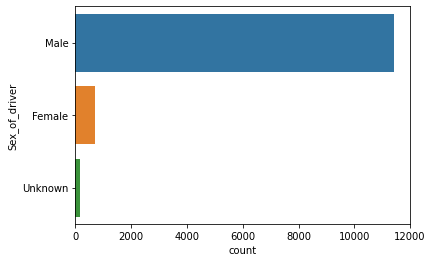

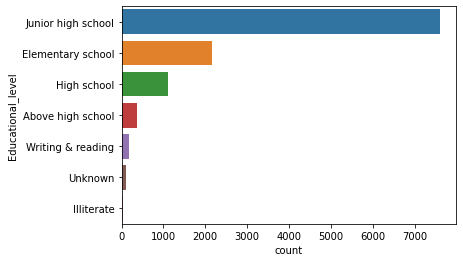

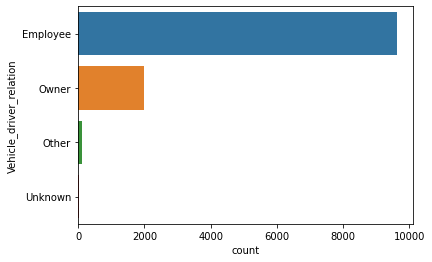

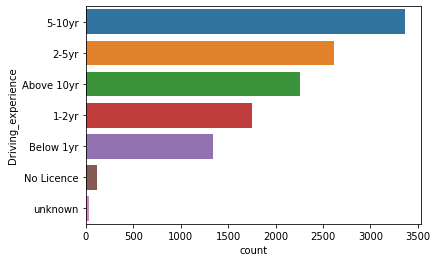

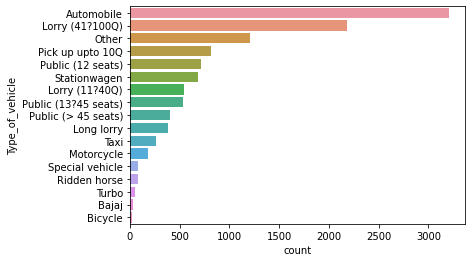

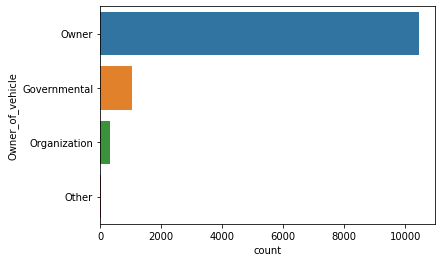

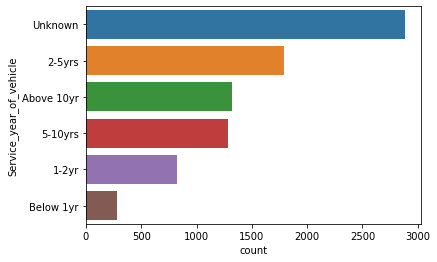

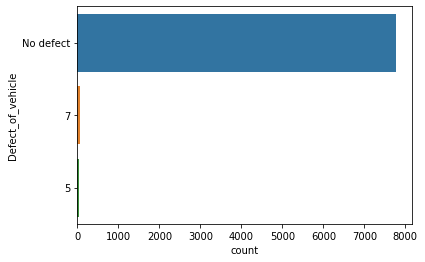

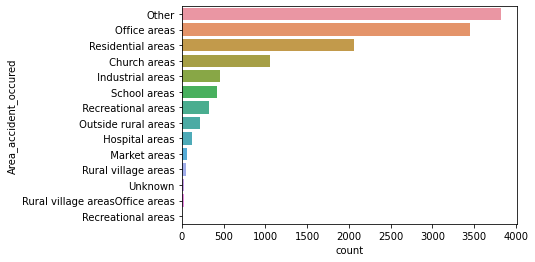

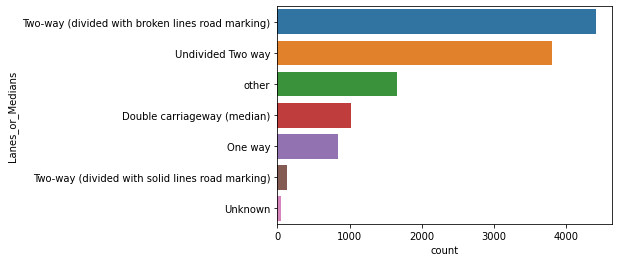

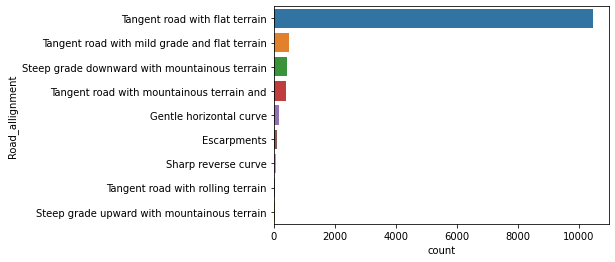

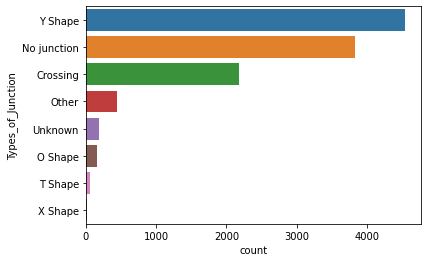

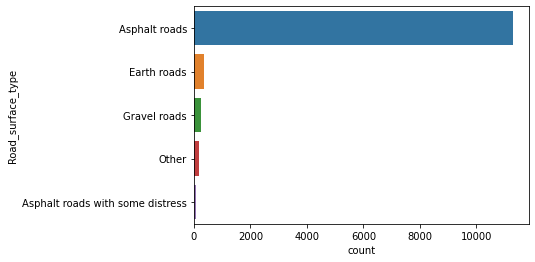

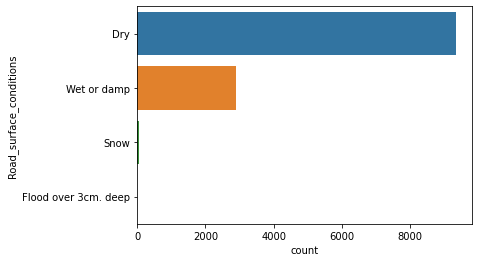

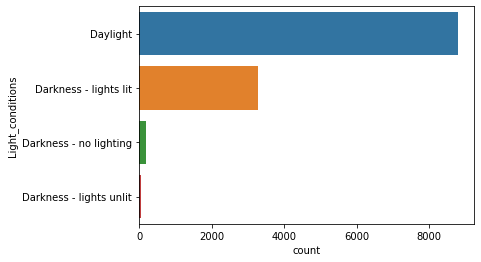

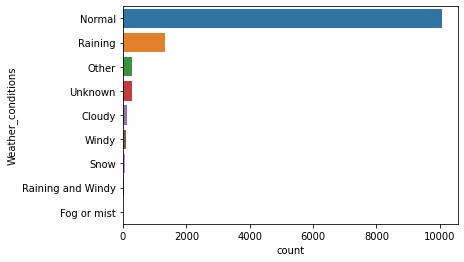

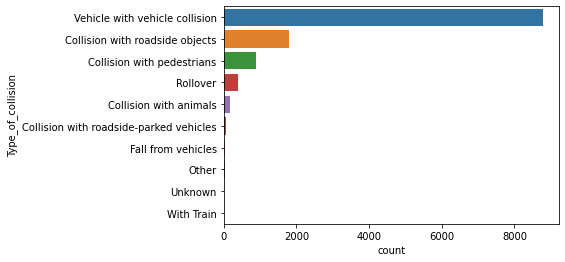

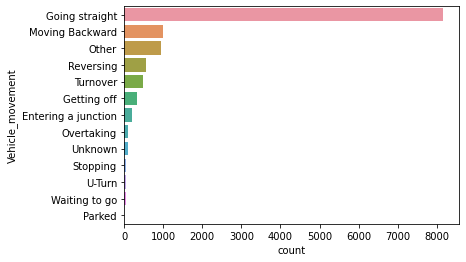

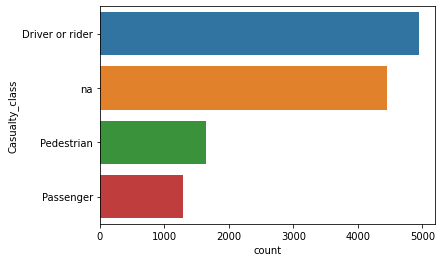

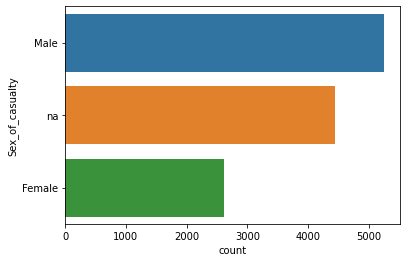

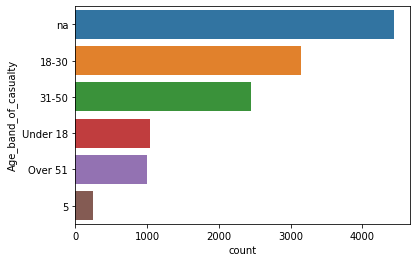

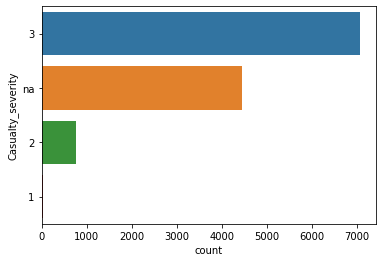

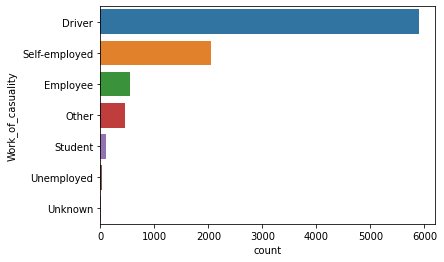

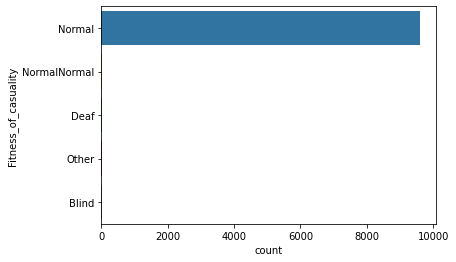

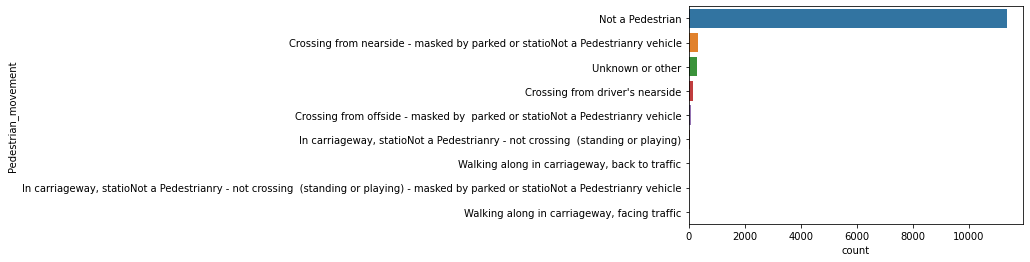

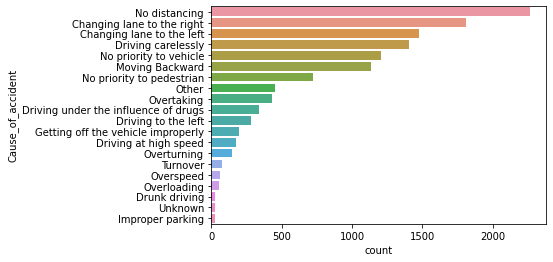

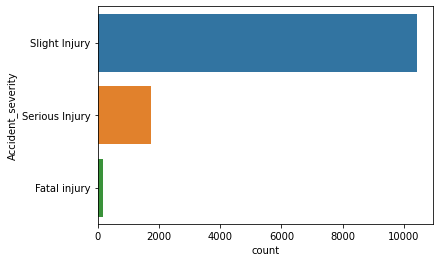

In [20]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        sns.countplot(y=col, data=data,order = data[col].value_counts().index)
        plt.show()

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ds_num = data.select_dtypes(include=numerics)

In [22]:
ds_num.columns

Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')

In [23]:
ds_num["Number_of_vehicles_involved_num"] = ds_num["Number_of_vehicles_involved"].apply(lambda x : 3 if x>3 else x )
ds_num["Number_of_casualties_num"] = ds_num["Number_of_casualties"].apply(lambda x : 5 if x>5 else x )

In [24]:
ds_num.Number_of_vehicles_involved_num.value_counts()

2    8340
1    1996
3    1980
Name: Number_of_vehicles_involved_num, dtype: int64

### Segment features by the target classes

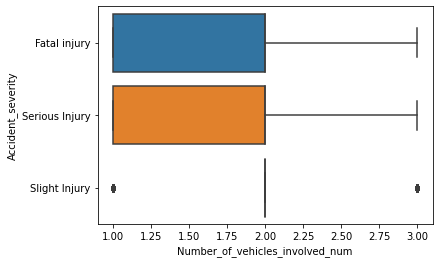

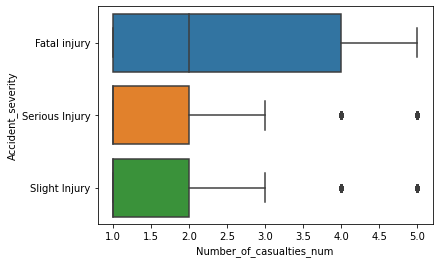

In [25]:
for col in ["Number_of_vehicles_involved_num","Number_of_casualties_num"]:
    sns.boxplot(y = data['Accident_severity'].astype('category'), x = col, data=ds_num)
    plt.show()

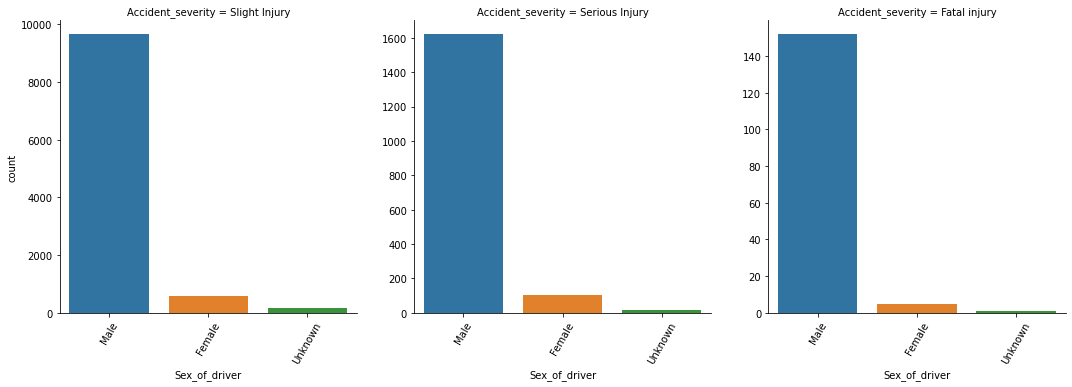

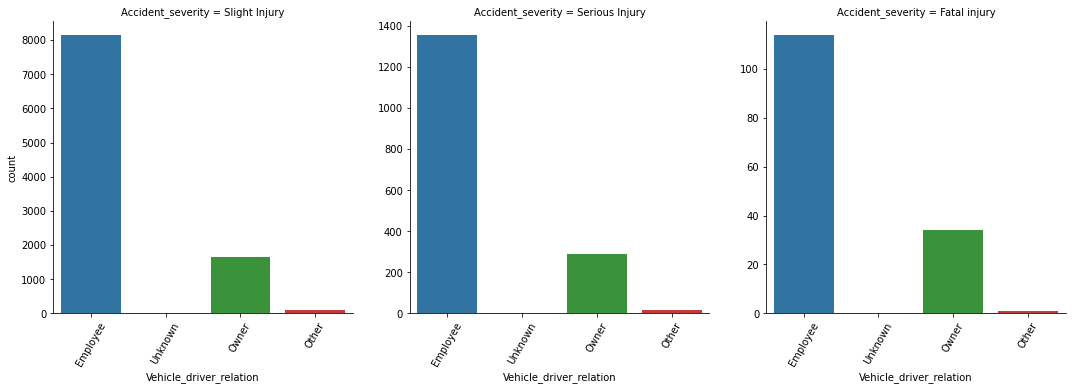

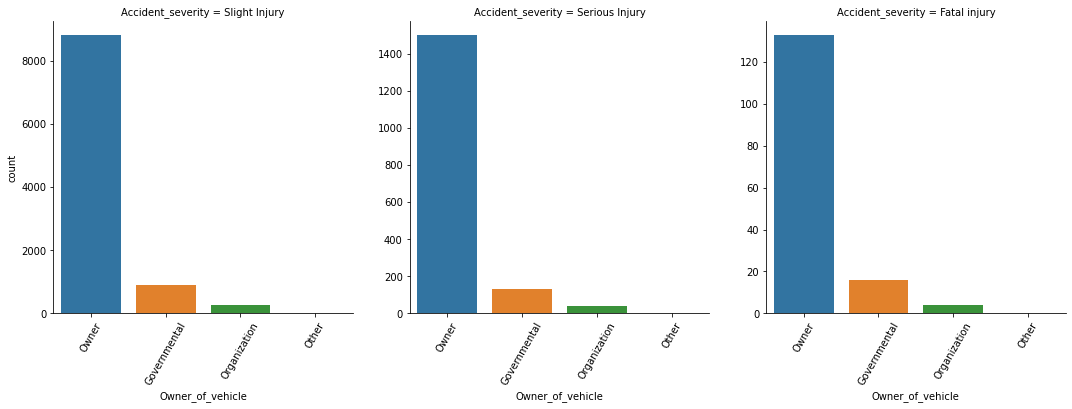

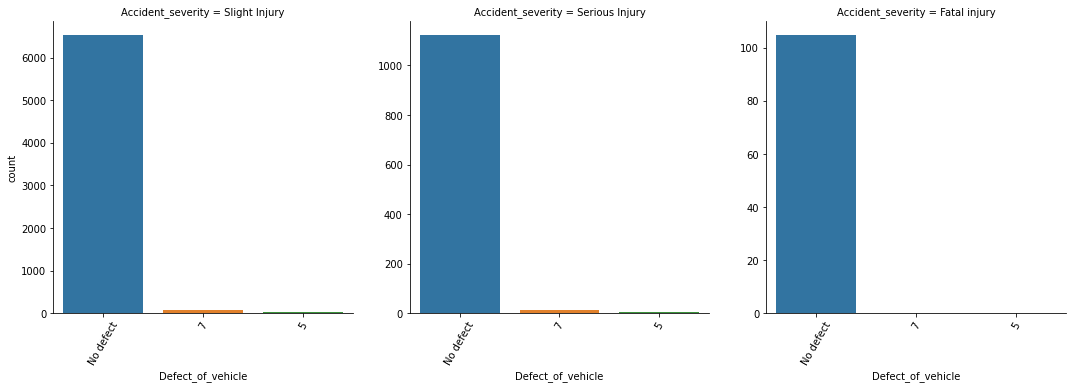

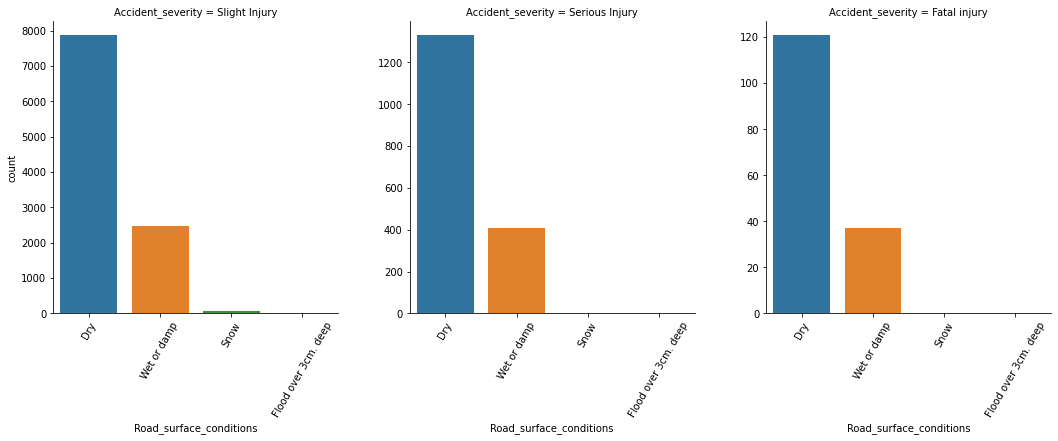

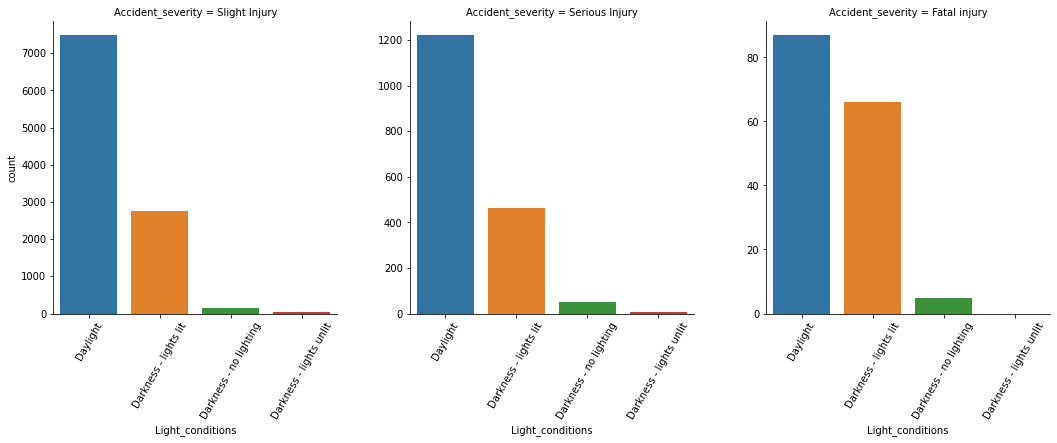

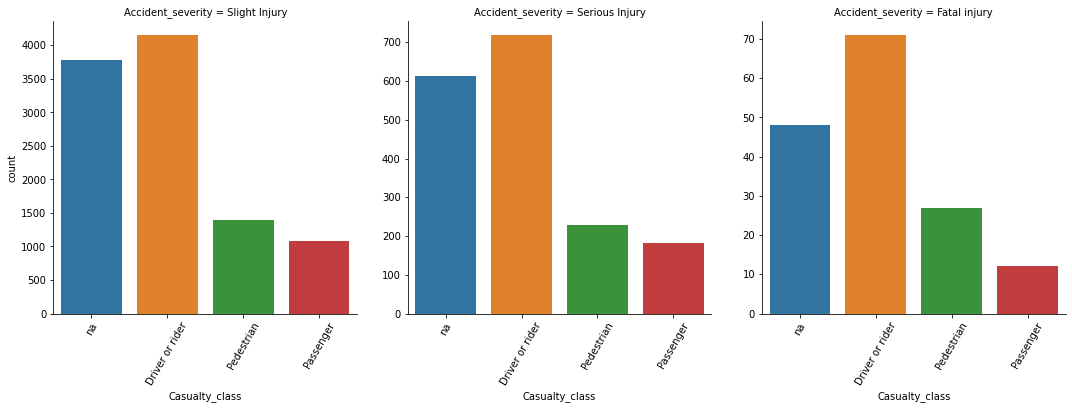

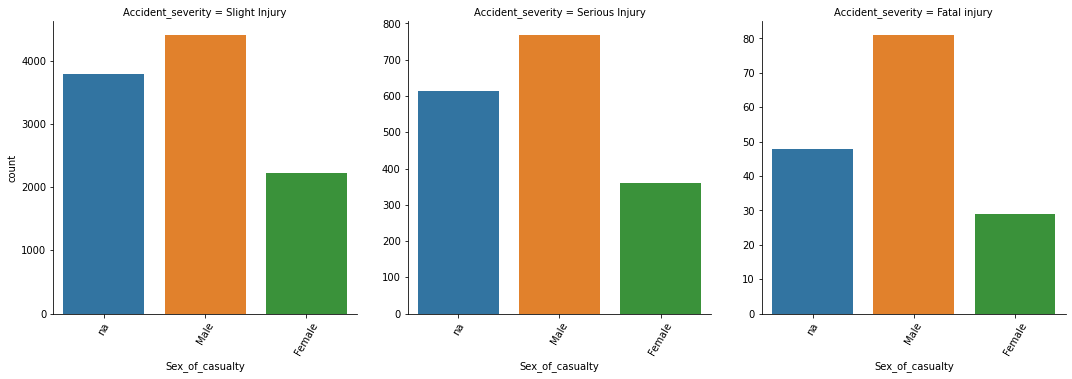

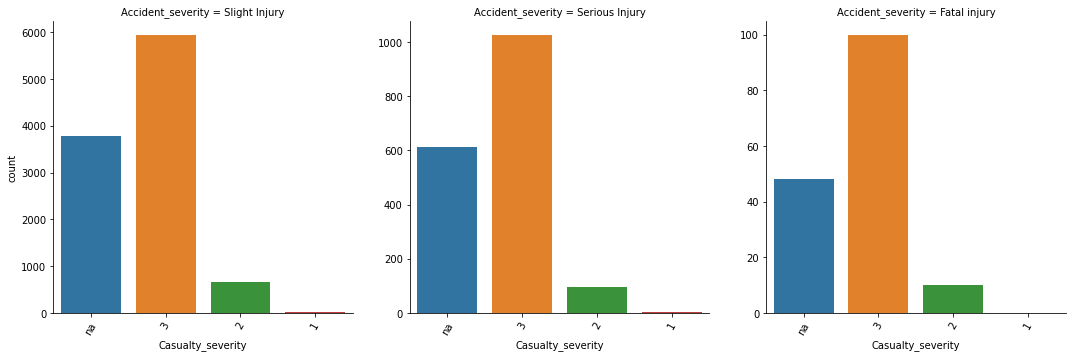

In [26]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 4 and col != 'Accident_severity':
        g = sns.catplot(x = col, kind='count', col = 'Accident_severity', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

# Pre-Processing

In [27]:
# converting 'time' to datetime
data['Time'] = pd.to_datetime(data['Time'])
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute
data.drop('Time', axis=1, inplace=True)

In [28]:
import numpy as np
import sklearn 
from sklearn.impute import SimpleImputer

In [29]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:,:] = imp.fit_transform(data)

In [30]:
data.isnull().sum().sum()

0

In [31]:
# dropping columns that can cause imbalance while imputation
data.drop(columns = ['Defect_of_vehicle', 'Fitness_of_casuality', 'Pedestrian_movement',], inplace=True)

In [32]:
data.select_dtypes(include='object')

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,Residential areas,...,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,Driver,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,...,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Driver,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,...,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,...,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,Industrial areas,...,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Driver,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,Outside rural areas,...,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Driver,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,Outside rural areas,...,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,Outside rural areas,...,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,Office areas,...,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Driving under the influence of drugs,Slight Injury


In [33]:
for col in data.select_dtypes(include='object'):
    enc = sklearn.preprocessing.LabelEncoder()
    data[col] = enc.fit_transform(data[col])

In [34]:
data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Cause_of_accident,Accident_severity,hour,minute
0,1,0,1,0,0,0,0,3,3,9,...,2,3,2,5,3,0,9,2,17,2
1,1,1,1,4,0,3,11,3,2,6,...,2,3,2,5,3,0,16,2,17,2
2,1,0,1,4,0,0,5,3,5,1,...,2,0,1,1,2,0,0,1,17,2
3,3,0,1,4,0,2,11,0,5,6,...,2,2,0,0,2,0,1,2,1,6
4,3,0,1,4,0,1,0,3,2,4,...,2,3,2,5,3,0,16,2,1,6


In [35]:
X=data.drop('Accident_severity',axis=1)
y=data.Accident_severity

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [38]:
#!pip install imblearn

In [39]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE

In [40]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 2, n=7827 (84.74%)
Class= 1, n=1298 (14.05%)
Class= 0, n=112 (1.21%)
Class= 2, n=7827 (33.33%)
Class= 1, n=7827 (33.33%)
Class= 0, n=7827 (33.33%)
Upsampled data shape:  (23481, 29) (23481,)


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
y_pred_tree = reg.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

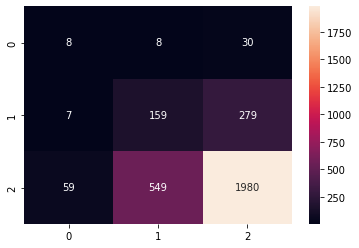

In [44]:
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, fmt='g')

### XGBoost

In [45]:
#!pip install xgboost

In [46]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from numpy import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score


In [47]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)

In [48]:
my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False, sample_weight=sample_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

<AxesSubplot:>

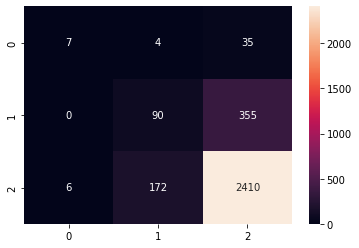

In [62]:
y_pred = my_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')